In [1]:
# installing pytorch lightning and transformer
! pip install --quiet lightning
! pip install --quiet transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# importing all necessary packages
from os import listdir
from os.path import join
from sklearn.model_selection import train_test_split
import string
# from torch.utils.data import Dataset, DataLoader
# import torch
# import torchmetrics
# import pytorch_lightning as pl
# from transformers import AutoModelForSequenceClassification
# from pytorch_lightning.loggers import TensorBoardLogger
# from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [3]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/BT5151/Group project'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/BT5151/Group project
/content/gdrive/My Drive/BT5151/Group project


In [4]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk import FreqDist
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
%run tokenizer_class.py

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [6]:
from tokenizer_class import tokenize_text_with_labels

In [11]:
df = pd.read_csv('Reviews.csv')

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(568454, 10)

# Data Pre-processing

In [13]:
# converting unix time to year/month/day format
df['Time_ymd']=df['Time'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))

# Drop Time column
df.drop(['Time'] ,axis=1, inplace=True)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Time_ymd
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13


In [14]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Summary                   object
Text                      object
Time_ymd                  object
dtype: object

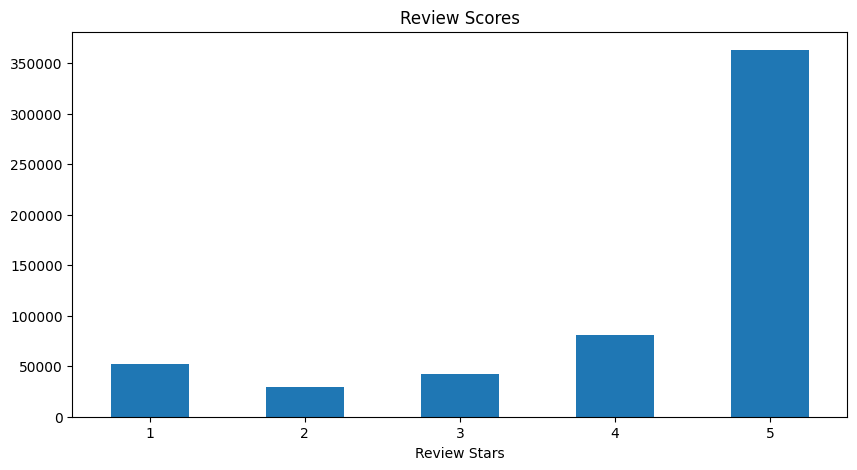

In [15]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Review Scores',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
# Rotate x-axis labels
plt.xticks(rotation=360)
plt.show()

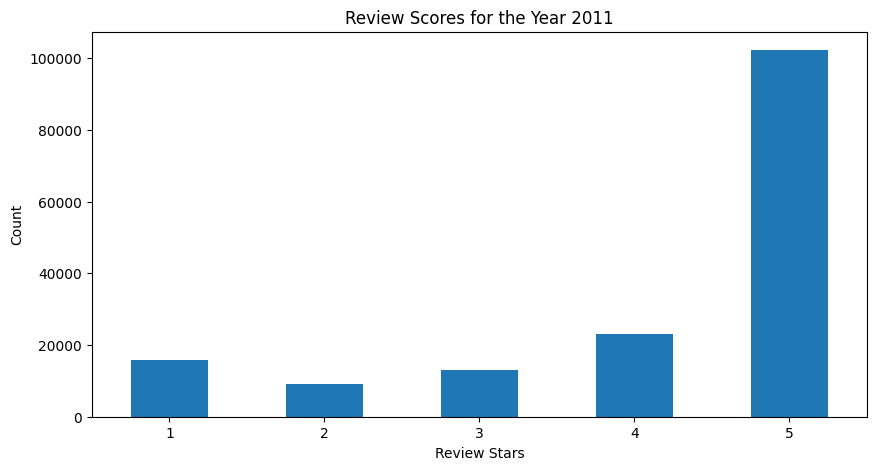

In [16]:
df['Time_ymd'] = pd.to_datetime(df['Time_ymd'], format='%Y-%m-%d', errors='coerce')

# Filter data for the year 2011
df_2011 = df[df['Time_ymd'].dt.year == 2011]

# Plot the review scores
ax = df_2011['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Review Scores for the Year 2011',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=360)

# Show the plot
plt.show()

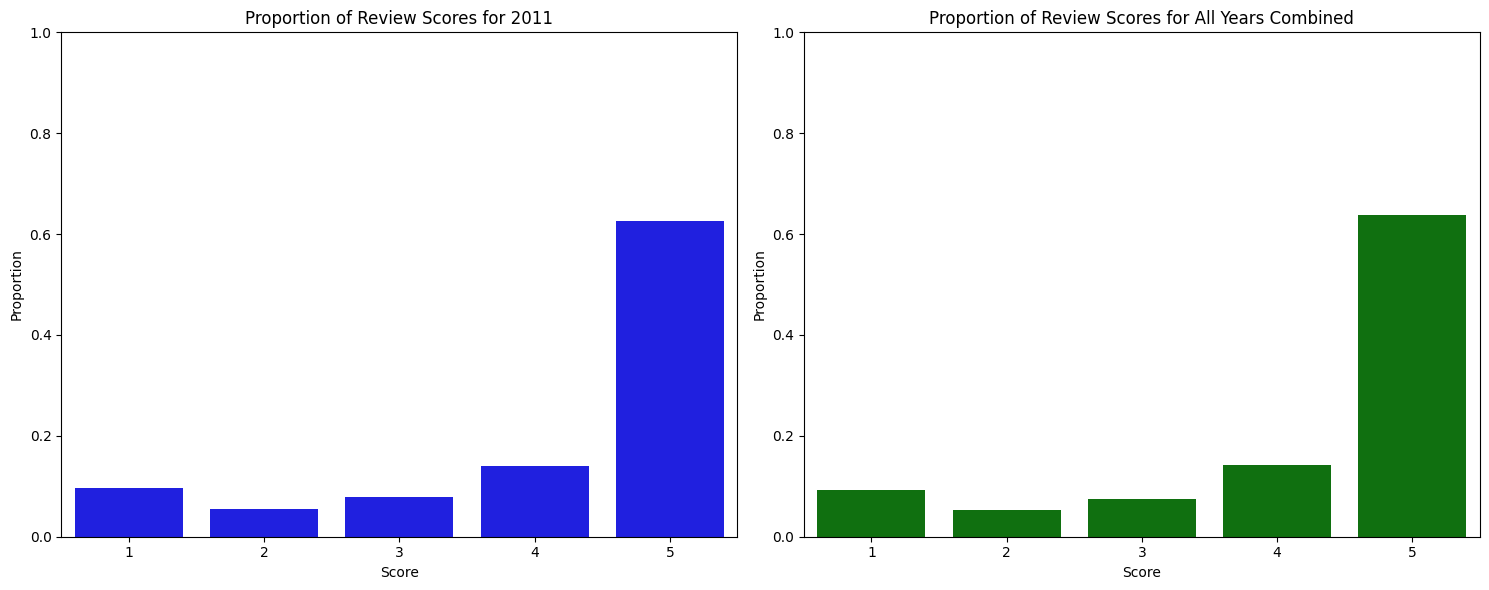

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the DataFrame with the 'Score' and 'Time_ymd' columns

# Calculate total counts for each score for the year 2011
counts_2011 = df[df['Time_ymd'].dt.year == 2011]['Score'].value_counts().sort_index()

# Calculate total counts for each score for all years combined
counts_all_years = df['Score'].value_counts().sort_index()

# Calculate proportion of each class for each year
proportion_2011 = counts_2011 / counts_2011.sum()
proportion_all_years = counts_all_years / counts_all_years.sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting for 2011
sns.barplot(x=proportion_2011.index, y=proportion_2011.values, color='blue', ax=axes[0])
axes[0].set_title('Proportion of Review Scores for 2011')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 1)  # Set y-axis limit to ensure proportions are shown properly

# Plotting for all years combined
sns.barplot(x=proportion_all_years.index, y=proportion_all_years.values, color='green', ax=axes[1])
axes[1].set_title('Proportion of Review Scores for All Years Combined')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Proportion')
axes[1].set_ylim(0, 1)  # Set y-axis limit to ensure proportions are shown properly

plt.tight_layout()
plt.show()



In [18]:
# Filter records from 2011
reviews_df = df[(df['Time_ymd'].dt.year == 2011)].copy()
reviews_df.reset_index(drop=True, inplace=True)

In [19]:
# Filter records from 2012 as unseen data
unseen_reviews = df[(df['Time_ymd'].dt.year == 2012)].copy()
unseen_reviews.reset_index(drop=True, inplace=True)

In [20]:
unique_years = reviews_df['Time_ymd'].dt.year.unique()
print(unique_years)
first_date = reviews_df['Time_ymd'].min()
last_date = reviews_df['Time_ymd'].max()

print("First Date:", first_date)
print("Last Date:", last_date)


[2011]
First Date: 2011-01-01 00:00:00
Last Date: 2011-12-31 00:00:00


In [21]:
reviews_df.shape

(163299, 10)

In [22]:
reviews_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               10
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Summary                    0
Text                       0
Time_ymd                   0
dtype: int64

In [23]:
# Fill those summary with 'NA' values with an empty space
reviews_df['Summary'].fillna('', inplace=True)

In [24]:
# Converting columns to string type
reviews_df.Text=reviews_df.Text.apply(str)
reviews_df.Summary=reviews_df.Summary.apply(str)

# Combine 'Summary' and 'Text'
reviews_df['Summary_Text']=reviews_df[['Summary','Text']].agg(' '.join, axis=1)
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Time_ymd,Summary_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Good Quality Dog Food I have bought several of...
1,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Cough Medicine If you are looking for the secr...
2,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...,2011-11-23,Yay Barley Right now I'm mostly just sprouting...
3,19,B001GVISJM,A2A9X58G2GTBLP,Wolfee1,0,0,5,GREAT SWEET CANDY!,"Twizzlers, Strawberry my childhood favorite ca...",2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch..."
4,20,B001GVISJM,A3IV7CL2C13K2U,Greg,0,0,5,Home delivered twizlers,Candy was delivered very fast and was purchase...,2011-10-08,Home delivered twizlers Candy was delivered ve...
...,...,...,...,...,...,...,...,...,...,...,...
163294,568439,B000NY4SAG,A3M89SF0SSOGBK,"Robert Goode ""GrampaG""",3,3,5,Baking Ammonia that Works,If you haven't ever used Ammonium Bicarbonate ...,2011-09-26,Baking Ammonia that Works If you haven't ever ...
163295,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,2011-12-13,"Delicious, all natural and allergy free treats..."
163296,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex...",2011-11-29,"If its all natural, this is like panacea of Sp..."
163297,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,Very large ground spice jars.,My only complaint is that there's so much of i...,2011-06-15,Very large ground spice jars. My only complain...


In [25]:
# Remove the unwanted features like Id and ProfileName.
reviews_df.drop(['Id','ProfileName'],axis=1, inplace=True)
reviews_df

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Time_ymd,Summary_Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Good Quality Dog Food I have bought several of...
1,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Cough Medicine If you are looking for the secr...
2,B000E7L2R4,A1MZYO9TZK0BBI,1,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...,2011-11-23,Yay Barley Right now I'm mostly just sprouting...
3,B001GVISJM,A2A9X58G2GTBLP,0,0,5,GREAT SWEET CANDY!,"Twizzlers, Strawberry my childhood favorite ca...",2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch..."
4,B001GVISJM,A3IV7CL2C13K2U,0,0,5,Home delivered twizlers,Candy was delivered very fast and was purchase...,2011-10-08,Home delivered twizlers Candy was delivered ve...
...,...,...,...,...,...,...,...,...,...
163294,B000NY4SAG,A3M89SF0SSOGBK,3,3,5,Baking Ammonia that Works,If you haven't ever used Ammonium Bicarbonate ...,2011-09-26,Baking Ammonia that Works If you haven't ever ...
163295,B005ZC0RRO,A2TO5R8QLIITEF,1,1,5,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,2011-12-13,"Delicious, all natural and allergy free treats..."
163296,B001EO7N10,APWCOAVILK94B,0,0,5,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex...",2011-11-29,"If its all natural, this is like panacea of Sp..."
163297,B001EO7N10,A1F6BHEYB7R6R7,0,0,5,Very large ground spice jars.,My only complaint is that there's so much of i...,2011-06-15,Very large ground spice jars. My only complain...


In [26]:
reviews_df.dtypes

ProductId                         object
UserId                            object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Summary                           object
Text                              object
Time_ymd                  datetime64[ns]
Summary_Text                      object
dtype: object

In [27]:
reviews_df['Summary_Text'][0]

'Good Quality Dog Food I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [28]:
reviews_df.drop(['Text','Summary'],axis=1, inplace=True)

In [29]:
# Calculate Helpfulness Ratio where 'HelpfulnessDenominator' > 0, otherwise put -1

reviews_df['Helpfulness_Ratio'] = np.where(reviews_df['HelpfulnessDenominator'] > 0, reviews_df['HelpfulnessNumerator'] / reviews_df['HelpfulnessDenominator'], -1)

# Drop HelpfulnessNumerator, HelpfulnessDenominator
reviews_df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator'], axis=1, inplace=True)
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0


In [30]:
# Check the number of duplicate records by grouping the data on UserId and ProductId
reviews_df[reviews_df.duplicated(['UserId','ProductId'])]

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio
203,B000ER6YO0,AWBKE3QTB3BWX,3,2011-09-14,Not as yummy as Earth's Best's other flavors W...,-1.000000
204,B000ER6YO0,ACM3Z9NLSE8S9,5,2011-09-01,Son's 2nd Favorite Dish I love the fact that t...,-1.000000
208,B000ER6YO0,A2NQKBC54RAZL5,5,2011-02-10,Our Baby's Favorite Dinner The Rice and Lentil...,-1.000000
263,B0030N5K1I,A2058UP7ATXFOF,3,2011-02-09,Not for my dogs... This does not reflect on th...,1.000000
711,B0016FY6H6,A2NLZ3M0OJV9NX,2,2011-08-12,"Way too weak for my tastes What can i say, I l...",0.750000
...,...,...,...,...,...,...
163167,B0030VJ8YU,A4DTM6B4IBYQX,2,2011-03-12,Um... no thanks (sorry Happy Baby) IF THIS IS ...,1.000000
163173,B0030VJ8YU,A5993LK5CYHAA,2,2011-11-18,It taste sour more than anything... My baby do...,1.000000
163176,B0030VJ8YU,A1S6HK2R1KUC5E,5,2011-10-11,Triplets love this! This is very smooth and ea...,1.000000
163183,B0030VJ8YU,A1N8YWKJVXVXKY,5,2011-03-22,I guess he likes it! This stuff has a strong t...,1.000000


In [31]:
# Droppping duplicate records and keeping the latest one per group
reviews_df=reviews_df.drop_duplicates(subset=['UserId','ProductId'], keep='last', inplace=False)
reviews_df.reset_index(drop=True, inplace=True)
# Check if the duplicates are still there
reviews_df[reviews_df.duplicated(['UserId','ProductId'])].count()

ProductId            0
UserId               0
Score                0
Time_ymd             0
Summary_Text         0
Helpfulness_Ratio    0
dtype: int64

In [32]:
reviews_df.shape

(161599, 6)

In [33]:
import re
import string
from nltk.corpus import stopwords

# Define stopwords and punctuation
stop_words = set(stopwords.words("english"))
stop_words.update([ "br", "href", "amazon", "product", "counter"])
punctuation = set(string.punctuation)

def Clean_Text(review):
    # Remove links
    review = re.sub(r'https?:\S*', '', review)
    review = re.sub(r'{link}', '', review)

    # Remove mentions
    review = re.sub(r'@[\w]*', '', review)

    # Remove non-alphanumeric characters
    review = re.sub(r'[^A-Za-z0-9]+', ' ', review)

    # Remove single digits
    review = re.sub(r'\b[0-9]+\b', '', review)

    # Remove HTML entities
    review = re.sub(r'&[a-z]+', '', review)

    # Remove punctuation
    review = ''.join(char for char in review if char not in punctuation)

    # Remove special
    review = review.replace('[^a-zA-Z#]',' ')

    # Tokenize the review
    tokens = review.lower().split()

    # Remove stopwords and transition words
    tokens = [token for token in tokens if token not in stop_words and len(token) > 3]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [34]:
# Apply the clean text on all reviews
reviews_df['Clean_Text']  = reviews_df['Summary_Text'].apply(lambda x: Clean_Text(x))
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...


In [35]:
reviews_df['Clean_Text'][1]

'cough medicine looking secret ingredient robitussin believe found addition root beer extract ordered good made cherry soda flavor medicinal'

In [36]:
reviews_df.loc[:, 'Original_Text_Length'] = reviews_df['Summary_Text'].apply(lambda review: len(review))

In [37]:
reviews_df.loc[:, 'Clean_Text_Length'] = reviews_df['Clean_Text'].apply(lambda review: len(review))

In [38]:
reviews_df

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text,Original_Text_Length,Clean_Text_Length
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...,285,162
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...,234,139
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...,142,70
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...,765,492
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...,169,103
...,...,...,...,...,...,...,...,...,...
161594,B000NY4SAG,A3M89SF0SSOGBK,5,2011-09-26,Baking Ammonia that Works If you haven't ever ...,1.0,baking ammonia works ever used ammonium bicarb...,293,187
161595,B005ZC0RRO,A2TO5R8QLIITEF,5,2011-12-13,"Delicious, all natural and allergy free treats...",1.0,delicious natural allergy free treats indie ca...,855,493
161596,B001EO7N10,APWCOAVILK94B,5,2011-11-29,"If its all natural, this is like panacea of Sp...",-1.0,natural like panacea spice mixes hoping tastes...,756,410
161597,B001EO7N10,A1F6BHEYB7R6R7,5,2011-06-15,Very large ground spice jars. My only complain...,-1.0,large ground spice jars complaint much huge am...,159,80


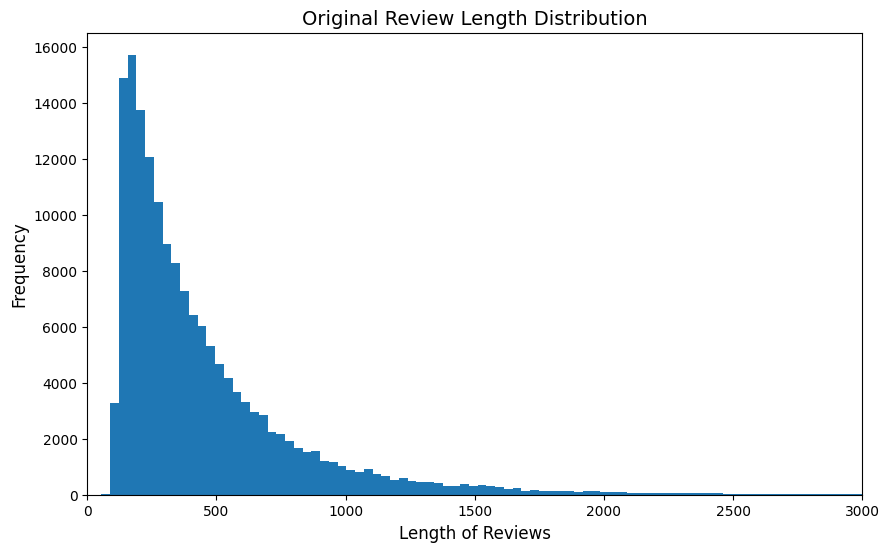

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(reviews_df['Original_Text_Length'], bins=500)

# Set x-axis limit
plt.xlim(0, 3000)

# Set title and labels
plt.title('Original Review Length Distribution', fontsize=14)
plt.xlabel('Length of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


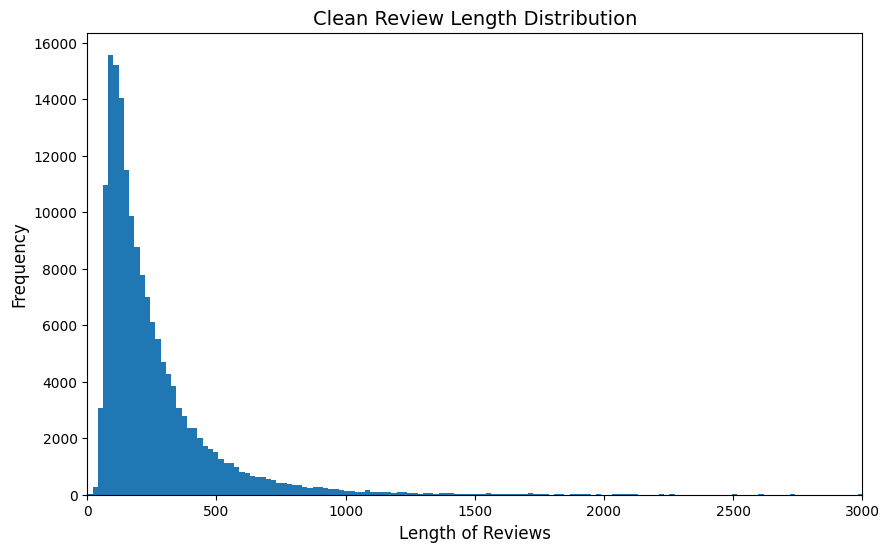

In [40]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(reviews_df['Clean_Text_Length'], bins=500)

# Set x-axis limit
plt.xlim(0, 3000)

# Set title and labels
plt.title('Clean Review Length Distribution', fontsize=14)
plt.xlabel('Length of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


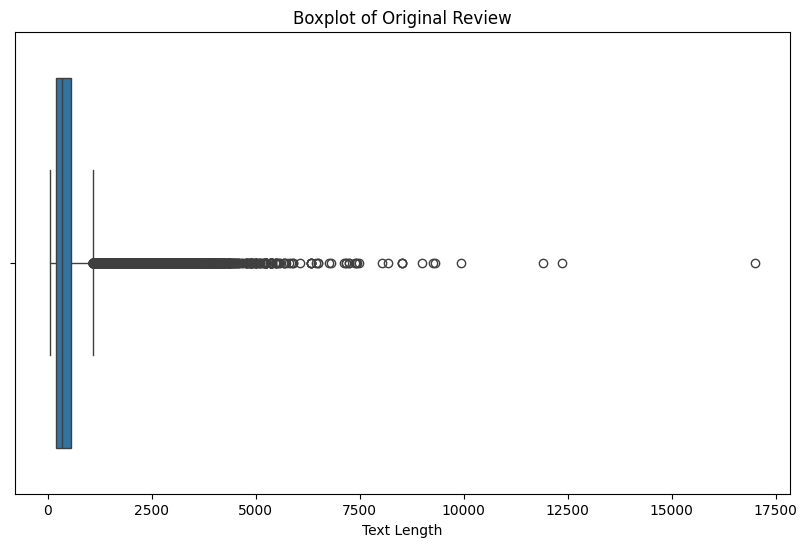

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews_df['Original_Text_Length'])
plt.title('Boxplot of Original Review')
plt.xlabel('Text Length')
plt.show()

In [42]:
reviews_df['Original_Text_Length'].describe()

count    161599.000000
mean        463.850674
std         435.359939
min          55.000000
25%         206.000000
50%         332.000000
75%         562.000000
max       16991.000000
Name: Original_Text_Length, dtype: float64

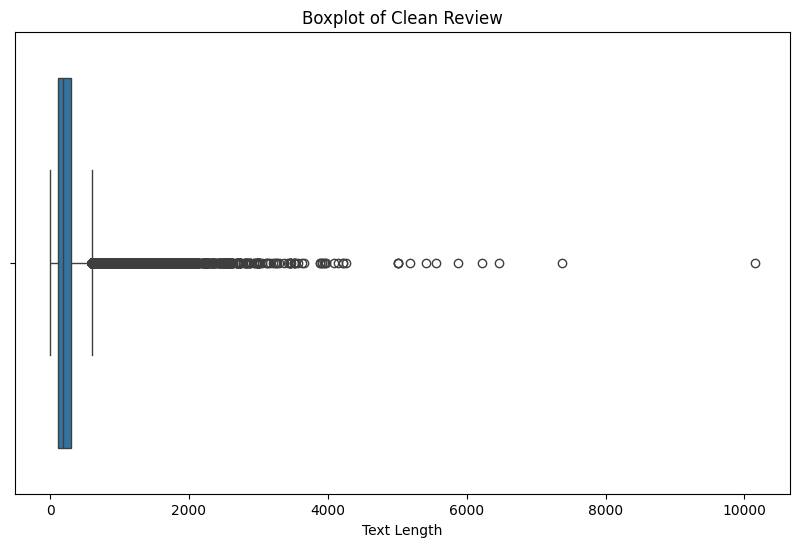

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews_df['Clean_Text_Length'])
plt.title('Boxplot of Clean Review')
plt.xlabel('Text Length')
plt.show()

In [44]:
reviews_df['Clean_Text_Length'].describe()

count    161599.000000
mean        255.562912
std         242.587991
min           0.000000
25%         115.000000
50%         183.000000
75%         308.000000
max       10148.000000
Name: Clean_Text_Length, dtype: float64

In [45]:
def score_classification(score):

    if score > 3:
        return 1
    elif score == 3:
        return 0
    else:
        return -1


In [46]:
# Classify the reviews based on 'Score'
reviews_df.loc[:, 'Sentiment'] = reviews_df['Score'].apply(score_classification)
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text,Original_Text_Length,Clean_Text_Length,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...,285,162,1
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...,234,139,-1
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...,142,70,1
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...,765,492,1
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...,169,103,1


In [47]:
# Group by 'UserId' and count the number of unique 'ProductId'
reviews_df['NumUniqueProducts'] = reviews_df.groupby('UserId')['ProductId'].transform('nunique')

In [48]:
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text,Original_Text_Length,Clean_Text_Length,Sentiment,NumUniqueProducts
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...,285,162,1,1
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...,234,139,-1,3
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...,142,70,1,2
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...,765,492,1,44
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...,169,103,1,1


In [49]:
max_date = reviews_df['Time_ymd'].max()
# Group by user ID and calculate the number of days since the last review for each user
days_since_last_review = reviews_df.groupby('UserId')['Time_ymd'].max().apply(lambda x: (max_date - x).days)

# Map the calculated values to the respective user IDs
reviews_df['Days_since_last_review'] = reviews_df['UserId'].map(days_since_last_review)


In [50]:
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text,Original_Text_Length,Clean_Text_Length,Sentiment,NumUniqueProducts,Days_since_last_review
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...,285,162,1,1,248
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...,234,139,-1,3,201
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...,142,70,1,2,37
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...,765,492,1,44,8
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...,169,103,1,1,84


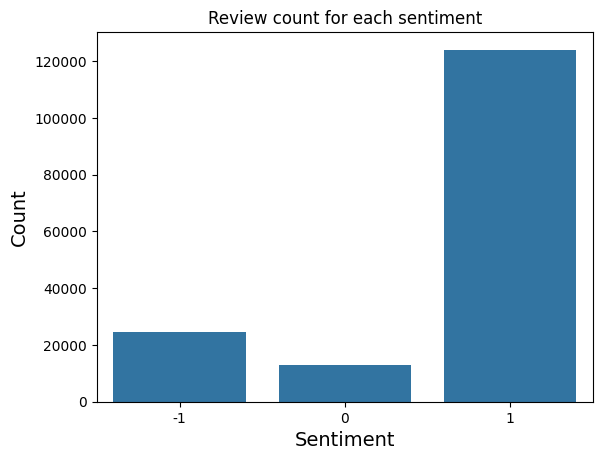

In [51]:
sns.countplot(x='Sentiment', data=reviews_df);
plt.xlabel('Sentiment',fontsize=14);
plt.ylabel('Count',fontsize=14);
plt.title('Review count for each sentiment');

The polarity is a float value in the range [-1, 1] where -1 represents very negative sentiment, 0 represents neutral sentiment, and 1 represents very positive sentiment. The subjectivity is a float value in the range [0, 1] where 0 represents objective text and 1 represents highly subjective text.

In [52]:
from textblob import TextBlob

# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
reviews_df['polarity'] = reviews_df['Clean_Text'].apply(get_polarity)

In [53]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

reviews_df['subjectivity'] = reviews_df['Clean_Text'].apply(get_subjectivity)

In [54]:
reviews_df.head()

,ProductId,UserId,Score,Time_ymd,Summary_Text,Helpfulness_Ratio,Clean_Text,Original_Text_Length,Clean_Text_Length,Sentiment,NumUniqueProducts,Days_since_last_review,polarity,subjectivity
0,B001E4KFG0,A3SGXH7AUHU8GW,5,2011-04-27,Good Quality Dog Food I have bought several of...,1.0,good quality food bought several vitality cann...,285,162,1,1,248,0.480000,0.440000
1,B000UA0QIQ,A395BORC6FGVXV,2,2011-06-13,Cough Medicine If you are looking for the secr...,1.0,cough medicine looking secret ingredient robit...,234,139,-1,3,201,0.150000,0.650000
2,B000E7L2R4,A1MZYO9TZK0BBI,5,2011-11-23,Yay Barley Right now I'm mostly just sprouting...,1.0,barley right mostly sprouting cats grass love ...,142,70,1,2,37,0.428571,0.545238
3,B001GVISJM,A2A9X58G2GTBLP,5,2011-12-23,"GREAT SWEET CANDY! Twizzlers, Strawberry my ch...",-1.0,great sweet candy twizzlers strawberry childho...,765,492,1,44,8,0.271429,0.550000
4,B001GVISJM,A3IV7CL2C13K2U,5,2011-10-08,Home delivered twizlers Candy was delivered ve...,-1.0,home delivered twizlers candy delivered fast p...,169,103,1,1,84,0.225000,0.675000


In [72]:
reviews_df.to_csv('reviews_df.csv', index=False)

In [ ]:
unseen_reviews.to_csv('unseen_reviews.csv',index=False)

# EDA

In [64]:
# get individual review, score (0/1/2) and actual score 1-5 from dataframe in the vector form
review_vec=reviews_df['Clean_Text']
score_vec=reviews_df['Sentiment']
actual_score_vec=reviews_df['Score']

In [65]:
review_vec

0         good quality food bought several vitality cann...
1         cough medicine looking secret ingredient robit...
2         barley right mostly sprouting cats grass love ...
3         great sweet candy twizzlers strawberry childho...
4         home delivered twizlers candy delivered fast p...
                                ...                        
161594    baking ammonia works ever used ammonium bicarb...
161595    delicious natural allergy free treats indie ca...
161596    natural like panacea spice mixes hoping tastes...
161597    large ground spice jars complaint much huge am...
161598    without great sesame chicken good better restu...
Name: Clean_Text, Length: 161599, dtype: object

In [ ]:
# initialize counters for posiive, negative and all reviews
positive_reviews=Counter()
negative_reviews=Counter()
neutral_reviews=Counter()
total_reviews=Counter()

In [ ]:
from tqdm import tqdm

for i in tqdm(range(len(review_vec))):
    review = review_vec[i]
    try:
        words = review.split()  # Split the review into words
        unique_words = set(words)  # Get unique words in the review
        for word in unique_words:
            total_reviews[word] += 1

            if score_vec[i] == -1:
                negative_reviews[word] += 1

            elif score_vec[i] == 1:
                positive_reviews[word] += 1

            elif score_vec[i] == 0:
                neutral_reviews[word] += 1
            else:
                total_reviews[word]
    except:
        continue



100%|██████████| 161599/161599 [00:26<00:00, 6087.50it/s]


In [ ]:
negative_FreqDist = FreqDist(negative_reviews)
negative_FreqDist.most_common(20)

[('like', 9460),
 ('taste', 7168),
 ('would', 6242),
 ('good', 5885),
 ('flavor', 4542),
 ('even', 4243),
 ('much', 3581),
 ('really', 3455),
 ('coffee', 3268),
 ('first', 3172),
 ('bought', 3165),
 ('tried', 3075),
 ('food', 3020),
 ('time', 2920),
 ('better', 2829),
 ('great', 2799),
 ('also', 2699),
 ('could', 2662),
 ('thought', 2536),
 ('disappointed', 2470)]

In [ ]:
# Generate word cloud
def generate_word_cloud(word_counter):
    wordcloud = WordCloud(background_color='white',width = 1000,height = 500).generate_from_frequencies(word_counter)
    fig = plt.figure(
        figsize = (10, 6),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

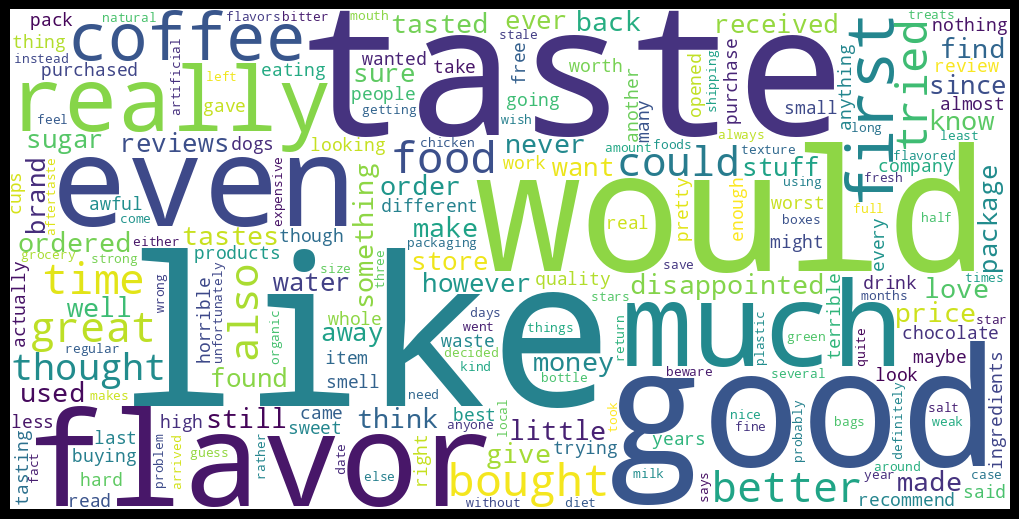

In [ ]:
generate_word_cloud(negative_reviews)

In [ ]:
# top 20 most common words in positive reviews
positive_FreqDist = FreqDist(positive_reviews)
positive_FreqDist.most_common(20)

[('great', 44201),
 ('good', 39898),
 ('like', 37344),
 ('love', 31001),
 ('taste', 27310),
 ('flavor', 23594),
 ('best', 21581),
 ('would', 19512),
 ('really', 18631),
 ('much', 17385),
 ('price', 17367),
 ('time', 16549),
 ('also', 16429),
 ('little', 16416),
 ('coffee', 16313),
 ('food', 15963),
 ('find', 15422),
 ('well', 14939),
 ('tried', 14347),
 ('better', 14070)]

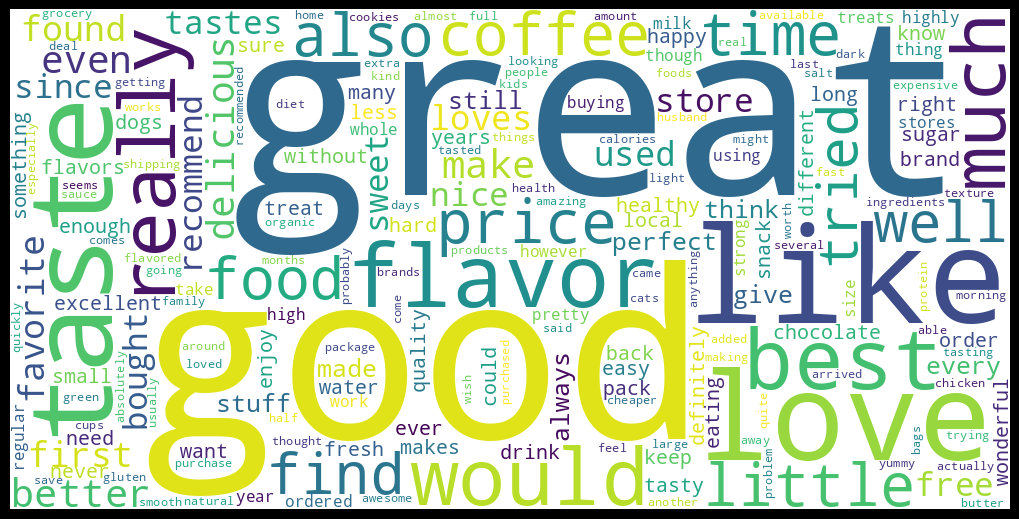

In [ ]:
generate_word_cloud(positive_reviews)

In [ ]:
reviews_df[['Original_Text_Length',"Clean_Text_Length",'polarity','subjectivity']].describe()

,Original_Text_Length,Clean_Text_Length,polarity,subjectivity
count,161599.000000,161599.000000,161599.000000,161599.000000
mean,463.850674,255.562912,0.279145,0.562577
std,435.359939,242.587991,0.238828,0.148432
min,55.000000,0.000000,-1.000000,0.000000
25%,206.000000,115.000000,0.137319,0.476667
50%,332.000000,183.000000,0.279630,0.563333
75%,562.000000,308.000000,0.427778,0.650000
max,16991.000000,10148.000000,1.000000,1.000000


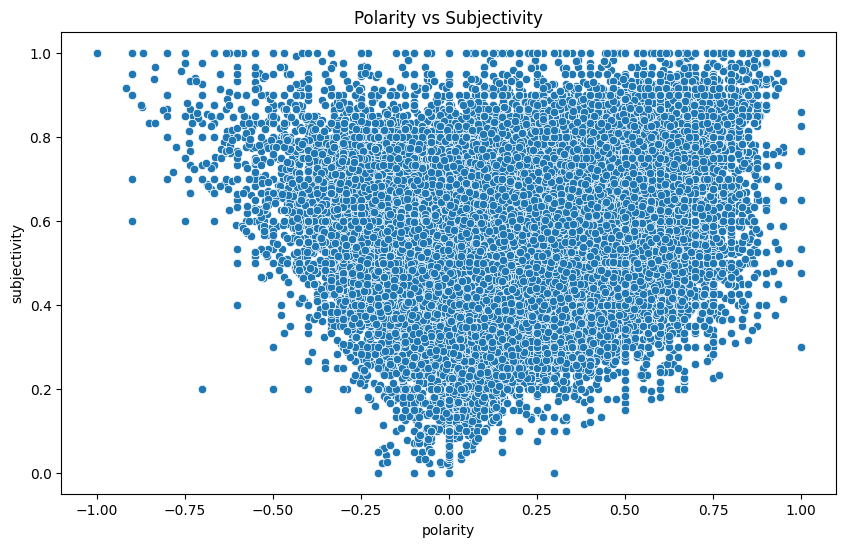

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reviews_df, x='polarity', y='subjectivity')

plt.title('Polarity vs Subjectivity')

# Show plot
plt.show()

In [ ]:
counter_pos_neg=Counter()

#words called in for over 100 times in whole reviews

for word,count in tqdm(total_reviews.most_common()):
    if(count>100):
        try:
            counter_pos_neg[word]=np.log(positive_FreqDist[word]/float(negative_FreqDist[word]+1))
        except:
            continue


100%|██████████| 59492/59492 [00:00<00:00, 1831515.72it/s]


In [ ]:
# Top 20 words are positive polar words which appear in more positive reviews
dict_top_pos=dict(counter_pos_neg.most_common(20))
# Bottom 20 words are negative polar words which appear in more negative reviews
dict_top_neg=dict(counter_pos_neg.most_common()[:-20:-1])

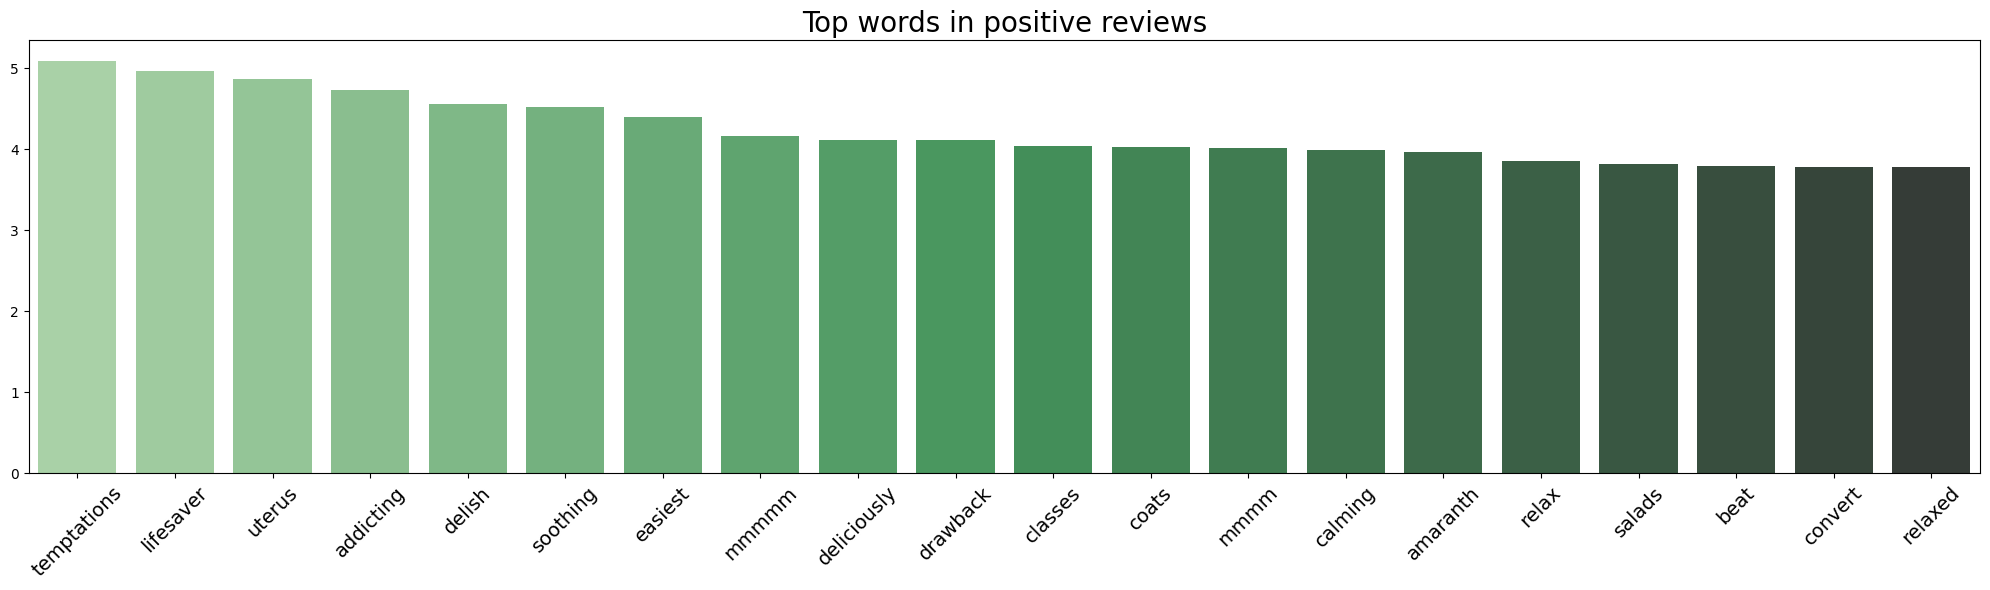

In [ ]:
# Top 20 most positive polar
plt.figure(figsize=(20,6))
sns.barplot(x=list(dict_top_pos.keys()), y=list(dict_top_pos.values()), palette="Greens_d")
plt.xticks(rotation=45,fontsize=14);
plt.title('Top words in positive reviews',fontsize=20);
plt.tight_layout();
plt.show()

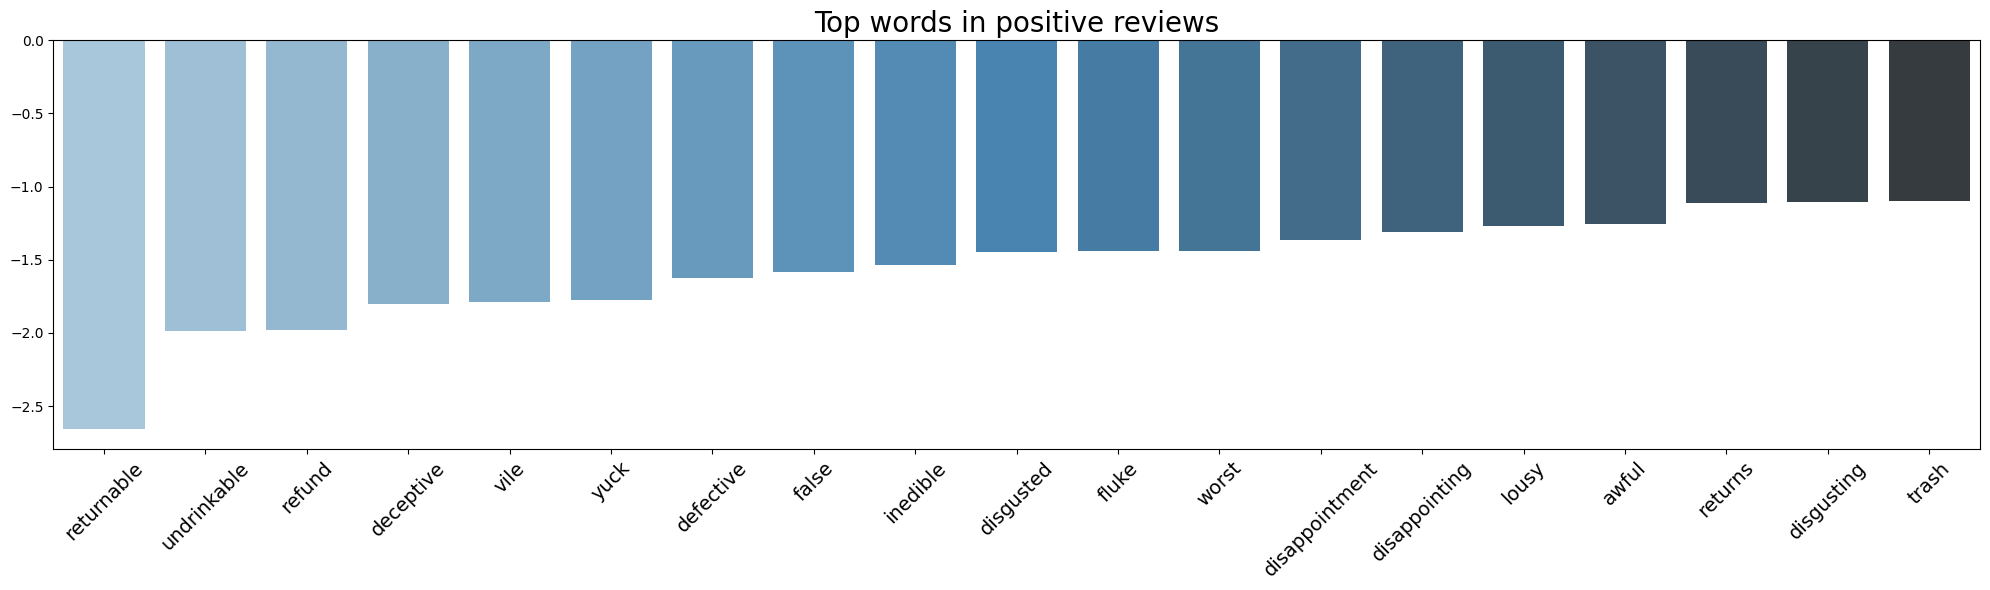

In [ ]:
# Top 20 most negative polar
plt.figure(figsize=(20,6))
sns.barplot(x=list(dict_top_neg.keys()), y=list(dict_top_neg.values()), palette="Blues_d")
plt.xticks(rotation=45,fontsize=14);
plt.title('Top words in positive reviews',fontsize=20);
plt.tight_layout();
plt.show()


# Balance Dataset

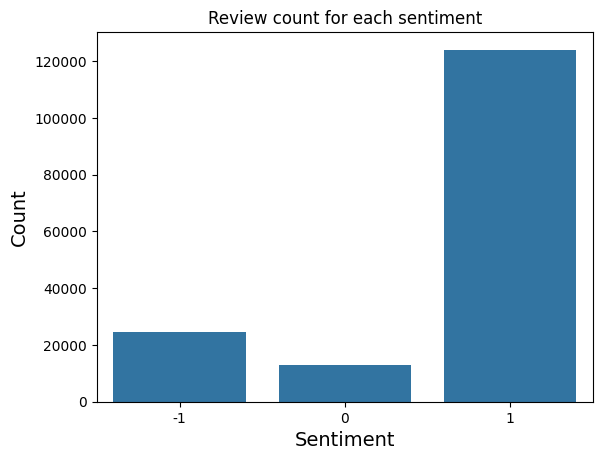

In [55]:
sns.countplot(x='Sentiment', data=reviews_df);
plt.xlabel('Sentiment',fontsize=14);
plt.ylabel('Count',fontsize=14);
plt.title('Review count for each sentiment');

In [56]:
reviews_df.columns

Index(['ProductId', 'UserId', 'Score', 'Time_ymd', 'Summary_Text',
       'Helpfulness_Ratio', 'Clean_Text', 'Original_Text_Length',
       'Clean_Text_Length', 'Sentiment', 'NumUniqueProducts',
       'Days_since_last_review', 'polarity', 'subjectivity'],
      dtype='object')

In [57]:
# Dataset 1 : Target - Sentiment ; Feature - Summary Text
df_1 = reviews_df[['Summary_Text','Sentiment']].copy()

# Dataset 2 : Target - Sentiment ; Feature - Clean Text
df_2 = reviews_df[['Clean_Text','Sentiment']].copy()

# Dataset 4 : Target - Sentiment ; Feature - Clean Text,Helpfulness Ratio,Clean Text Length,Days since last review,polarity,subjectivity
df_3 = reviews_df[['Summary_Text','Helpfulness_Ratio','Original_Text_Length',"Days_since_last_review",'polarity','subjectivity','Sentiment']].copy()

# Dataset 4 : Target - Sentiment ; Feature - Clean Text,Helpfulness Ratio,Clean Text Length,Days since last review,polarity,subjectivity
df_4 = reviews_df[['Clean_Text','Helpfulness_Ratio','Clean_Text_Length',"Days_since_last_review",'polarity','subjectivity','Sentiment']].copy()

In [58]:
print(df_1.columns)
print(df_2.columns)
print(df_3.columns)
print(df_4.columns)

Index(['Summary_Text', 'Sentiment'], dtype='object')
Index(['Clean_Text', 'Sentiment'], dtype='object')
Index(['Summary_Text', 'Helpfulness_Ratio', 'Original_Text_Length',
       'Days_since_last_review', 'polarity', 'subjectivity', 'Sentiment'],
      dtype='object')
Index(['Clean_Text', 'Helpfulness_Ratio', 'Clean_Text_Length',
       'Days_since_last_review', 'polarity', 'subjectivity', 'Sentiment'],
      dtype='object')


In [59]:
# Split the dataset into training and testing sets (80-20 ratio)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1['Summary_Text'], df_1['Sentiment'], shuffle= True, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2['Clean_Text'], df_2['Sentiment'], shuffle= True, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_3[['Summary_Text','Helpfulness_Ratio','Original_Text_Length',"Days_since_last_review",'polarity','subjectivity']], df_3['Sentiment'], shuffle= True, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_4[['Clean_Text','Helpfulness_Ratio','Clean_Text_Length',"Days_since_last_review",'polarity','subjectivity']], df_4['Sentiment'], shuffle= True, test_size=0.2, random_state=42)


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the text features
X_train_transformed_1 = vectorizer.fit_transform(X_train_1)
X_test_transformed_1 = vectorizer.transform(X_test_1)

X_train_transformed_2 = vectorizer.fit_transform(X_train_2)
X_test_transformed_2 = vectorizer.transform(X_test_2)

X_train_transformed_3 = vectorizer.fit_transform(X_train_3['Summary_Text'])
X_test_transformed_3 = vectorizer.transform(X_test_3['Summary_Text'])

X_train_transformed_4 = vectorizer.fit_transform(X_train_4['Clean_Text'])
X_test_transformed_4 = vectorizer.transform(X_test_4['Clean_Text'])

In [61]:
# Balance data using SMOTE
from imblearn.over_sampling import SMOTE
balance = SMOTE(random_state=42)

balanced_X_train_1, balanced_y_train_1 = balance.fit_resample(X_train_transformed_1, y_train_1)
balanced_X_train_2, balanced_y_train_2 = balance.fit_resample(X_train_transformed_2, y_train_2)
balanced_X_train_3, balanced_y_train_3 = balance.fit_resample(X_train_transformed_3, y_train_3)
balanced_X_train_4, balanced_y_train_4 = balance.fit_resample(X_train_transformed_4, y_train_4)

In [62]:
import pandas as pd

def get_label_counts_df(balanced_y_train, title):
    # Count the number of occurrences of each label
    label_counts = balanced_y_train.value_counts()

    # Create a DataFrame to display the counts
    label_counts_df = pd.DataFrame({'Label': label_counts.index, title: label_counts.values})

    # Set the index to the Label column
    label_counts_df.set_index('Label', inplace=True)

    return label_counts_df

# Get label counts DataFrames for each DataFrame
label_counts_df_1 = get_label_counts_df(balanced_y_train_1, 'DataFrame 1')
label_counts_df_2 = get_label_counts_df(balanced_y_train_2, 'DataFrame 2')
label_counts_df_3 = get_label_counts_df(balanced_y_train_3, 'DataFrame 3')
label_counts_df_4 = get_label_counts_df(balanced_y_train_4, 'DataFrame 4')

# Concatenate label counts DataFrames into a single DataFrame
combined_label_counts_df = pd.concat([label_counts_df_1, label_counts_df_2, label_counts_df_3, label_counts_df_4], axis=1)

# Print the combined table
print("Combined Label Counts Table:")
combined_label_counts_df



Combined Label Counts Table:


,DataFrame 1,DataFrame 2,DataFrame 3,DataFrame 4
Label,,,,
1,99189,99189,99189,99189
0,99189,99189,99189,99189
-1,99189,99189,99189,99189


# Baseline Models



In [63]:
# Evaluate the model based on accuray, precision, recall, F1 and ROC score
def evaluate_model(x_test, y_true, model,modelname):
  from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score ,classification_report, RocCurveDisplay
  y_pred = model.predict(x_test)
  print(modelname)
  precision = precision_score(y_true, y_pred,average='weighted')
  print('Precision: {:.2f}%'.format(precision))
  recall = recall_score(y_true, y_pred, average='weighted')
  print('Recall: {:.2f}%'.format( recall))
  f1 = f1_score(y_true, y_pred,average='weighted')
  print('F1_score: {:.2f}%'.format(f1))


  print('**********************************************************')
  print('*****************  Classification Report  ****************')
  print('**********************************************************')
  print(classification_report(y_true,y_pred))


###  _Naive Bayes Multinomial_

In [64]:
nb = MultinomialNB()
modelname = 'Naive Bayes (Only Original Review)'
nb.fit(balanced_X_train_1,balanced_y_train_1)
evaluate_model(X_test_transformed_1, y_test_1, nb, modelname)

Naive Bayes (Only Original Review)
Precision: 0.87%
Recall: 0.79%
F1_score: 0.82%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.67      0.76      0.71      5015
           0       0.29      0.68      0.41      2503
           1       0.97      0.81      0.88     24802

    accuracy                           0.79     32320
   macro avg       0.64      0.75      0.67     32320
weighted avg       0.87      0.79      0.82     32320



In [65]:
modelname = 'Naive Bayes (Only Clean Review)'
nb.fit(balanced_X_train_2,balanced_y_train_2)
evaluate_model(X_test_transformed_2, y_test_2, nb, modelname )

Naive Bayes (Only Clean Review)
Precision: 0.86%
Recall: 0.79%
F1_score: 0.82%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.66      0.74      0.70      5015
           0       0.28      0.65      0.40      2503
           1       0.96      0.81      0.88     24802

    accuracy                           0.79     32320
   macro avg       0.64      0.74      0.66     32320
weighted avg       0.86      0.79      0.82     32320



In [66]:
modelname = 'Naive Bayes (Other Features and Original Review)'
nb.fit(balanced_X_train_3,balanced_y_train_3)
evaluate_model(X_test_transformed_3, y_test_3, nb, modelname )

Naive Bayes (Other Features and Original Review)
Precision: 0.87%
Recall: 0.79%
F1_score: 0.82%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.67      0.76      0.71      5015
           0       0.29      0.68      0.41      2503
           1       0.97      0.81      0.88     24802

    accuracy                           0.79     32320
   macro avg       0.64      0.75      0.67     32320
weighted avg       0.87      0.79      0.82     32320



In [67]:
modelname = 'Naive Bayes (Other Features and Clean Review)'
nb.fit(balanced_X_train_4,balanced_y_train_4)
evaluate_model(X_test_transformed_4, y_test_4, nb, modelname)

Naive Bayes (Other Features and Clean Review)
Precision: 0.86%
Recall: 0.79%
F1_score: 0.82%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.66      0.74      0.70      5015
           0       0.28      0.65      0.40      2503
           1       0.96      0.81      0.88     24802

    accuracy                           0.79     32320
   macro avg       0.64      0.74      0.66     32320
weighted avg       0.86      0.79      0.82     32320



### _Logistic Regression_

In [68]:
log = LogisticRegression()
modelname = 'Logistic Regression (Only Original Review)'
log.fit(balanced_X_train_1, balanced_y_train_1)
evaluate_model(X_test_transformed_1, y_test_1, log, modelname)

Logistic Regression (Only Original Review)
Precision: 0.90%
Recall: 0.87%
F1_score: 0.88%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.77      0.81      0.79      5015
           0       0.41      0.68      0.51      2503
           1       0.97      0.89      0.93     24802

    accuracy                           0.87     32320
   macro avg       0.72      0.80      0.74     32320
weighted avg       0.90      0.87      0.88     32320



In [69]:
modelname = 'Logistic Regression (Only Clean Review)'
log.fit(balanced_X_train_2, balanced_y_train_2)
evaluate_model(X_test_transformed_2, y_test_2, log, modelname)

Logistic Regression (Only Clean Review)
Precision: 0.88%
Recall: 0.84%
F1_score: 0.85%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.73      0.79      0.76      5015
           0       0.35      0.65      0.46      2503
           1       0.97      0.87      0.91     24802

    accuracy                           0.84     32320
   macro avg       0.68      0.77      0.71     32320
weighted avg       0.88      0.84      0.85     32320



In [70]:
modelname = 'Logistic Regression (Other Features and Original Review)'
log.fit(balanced_X_train_3, balanced_y_train_3)
evaluate_model(X_test_transformed_3, y_test_3, log, modelname)

Logistic Regression (Other Features and Original Review)
Precision: 0.90%
Recall: 0.87%
F1_score: 0.88%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.77      0.81      0.79      5015
           0       0.41      0.68      0.51      2503
           1       0.97      0.89      0.93     24802

    accuracy                           0.87     32320
   macro avg       0.72      0.80      0.74     32320
weighted avg       0.90      0.87      0.88     32320



In [71]:
modelname = 'Logistic Regression(Other Features and Clean Review)'
log.fit(balanced_X_train_4, balanced_y_train_4)
evaluate_model(X_test_transformed_4, y_test_4, log, modelname)

Logistic Regression(Other Features and Clean Review)
Precision: 0.88%
Recall: 0.84%
F1_score: 0.85%
**********************************************************
*****************  Classification Report  ****************
**********************************************************
              precision    recall  f1-score   support

          -1       0.73      0.79      0.76      5015
           0       0.35      0.65      0.46      2503
           1       0.97      0.87      0.91     24802

    accuracy                           0.84     32320
   macro avg       0.68      0.77      0.71     32320
weighted avg       0.88      0.84      0.85     32320



# Distilbert Transformers

In [ ]:
# Split the dataset into training, validation, and testing sets (80-10-10 ratio)
X_train, X_temp, y_train, y_temp = train_test_split(reviews_df['Summary_Text'], reviews_df['Sentiment'], test_size=0.2,shuffle=True,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create DataFrame for train data
train_df = pd.DataFrame({'Summary_Text': X_train, 'Score': y_train})

# Create DataFrame for test data
test_df = pd.DataFrame({'Summary_Text': X_test, 'Score': y_test})

# Assuming you have already split the test_df for validation and test set,
# you can proceed similarly to create DataFrame for validation data
val_df = pd.DataFrame({'Summary_Text': X_val, 'Score': y_val})

In [ ]:
train_df['Score'].unique()

array([ 1,  0, -1])

In [ ]:
# Check the sizes of the sets
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the testing set: {len(test_df)}")

Number of samples in the training set: 129279
Number of samples in the validation set: 16160
Number of samples in the testing set: 16160


In [ ]:
from transformers import AutoTokenizer
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.data import Dataset
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Instantiate the dataset objects

train_dataset = tokenize_text_with_labels(train_df, 512)
val_dataset = tokenize_text_with_labels(val_df, 512)
test_dataset = tokenize_text_with_labels(test_df, 512)

# Create DataLoader for each set
train_loader = DataLoader(
    dataset=train_dataset,
    persistent_workers = True,
    batch_size=40,
    shuffle=True,
    num_workers=5
)

val_loader = DataLoader(
    dataset=val_dataset,
    persistent_workers = True,
    batch_size=40,
    num_workers=5
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=40,
    num_workers=5
)


In [ ]:
train_dataset[0]

{'input_ids': tensor([  101, 11937, 21756,  2021,  2009,  2515,  5383,  5796,  2290,  2023,
          8945, 19231,  7811,  2003,  2200, 11937, 21756,  1998,  2763,  2062,
          7965,  2084,  2087,  2021,  2009,  2515,  5383,  5796,  2290,  5023,
          1999,  1996,  2433,  1997, 21957, 14817,  1012,  1996,  3861,  1997,
          1996,  4031,  2747,  2108,  2109,  4415,  6815,  1000,  2053,  5796,
          2290,  1000,  2003,  2019,  2214,  2028,  1012,  1996,  7751,  2038,
          2062,  3728, 24501, 15459,  5732,  2037,  4366,  1998,  3718,  1996,
          1000,  2053,  5796,  2290,  1000,  2013,  1996, 14793,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
# write your code here
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# freeze all layer
for param in model.parameters():
    param.requires_grad = False
    # unfreeze last layer
for param in model.pre_classifier.parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

In [ ]:
import numpy as np
np.random.seed(25)

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.classification import MulticlassPrecision, MulticlassRecall

class LightningModel(pl.LightningModule):
    def __init__(self, model, learning_rate=5e-5):
        super().__init__()

        self.learning_rate = learning_rate
        self.model = model ## use pretrained DistilBERT model

        self.val_f1 = torchmetrics.F1Score(task="multiclass", num_classes=3, average='weighted')
        self.val_precision = MulticlassPrecision(num_classes=3, average='weighted')
        self.val_recall = MulticlassRecall(num_classes=3, average='weighted')
        self.test_f1 = torchmetrics.F1Score(task="multiclass", num_classes=3, average='weighted')
        self.test_precision = MulticlassRecall(num_classes=3, average='weighted')
        self.test_recall = MulticlassRecall(num_classes=3, average='weighted')
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, labels):
        return self.model(input_ids, attention_mask=attention_mask, labels=labels)

    def training_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])
        self.log("train_loss", outputs["loss"])
        return outputs["loss"]  # this is passed to the optimizer for training

    def validation_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])
        self.log("val_loss", outputs["loss"], prog_bar=True)
        logits = outputs["logits"]
        predicted_labels = torch.argmax(logits, 1)
        self.val_f1(predicted_labels, batch["label"])
        self.val_precision(predicted_labels, batch["label"])
        self.val_recall(predicted_labels, batch["label"])
        self.log_dict({"val_f1": self.val_f1, "val_precision": self.val_precision, "val_recall": self.val_recall}, on_step=False, on_epoch=True, prog_bar =True)


    def test_step(self, batch, batch_idx):
        outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                       labels=batch["label"])
        logits = outputs["logits"]
        predicted_labels = torch.argmax(logits, 1)
        self.test_f1(predicted_labels, batch["label"])
        self.test_precision(predicted_labels, batch["label"])
        self.test_recall(predicted_labels, batch["label"])
        self.log_dict({"test_f1": self.test_f1, "test_precision": self.test_precision, "test_recall": self.test_recall}, on_step=False, on_epoch=True)


    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer


lightning_model = LightningModel(model)


In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        save_top_k=1, mode="max", monitor="val_f1",
        dirpath= '/content/gdrive/My Drive/BT5151/Group project',  # Directory to save the checkpoints
        filename='best_model_{epoch:02d}-{val_f1:.2f}',
    )  # save top 1 model
]

In [ ]:
trainer = pl.Trainer(
    max_epochs=10,
    callbacks=callbacks,
    accelerator="gpu",
    devices=1,
    log_every_n_steps= 5000

)
trainer.fit(model=lightning_model,
            train_dataloaders=train_loader,
            val_dataloaders=val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type                                | Params
-----------------------------------------------------------------------
0 | model          | DistilBertForSequenceClassification | 67.0 M
1 | val_f1         | MulticlassF1Score                   | 0     
2 | val_precision  | MulticlassPrecision                 | 0     
3 | val_recall     | MulticlassRecall                    | 0     
4 | test_f1        | MulticlassF1Score                   | 0     
5 | test_precision | MulticlassRecall                    | 0     
6 | test_re

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(lightning_model, dataloaders=test_loader, ckpt_path="best")

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/gdrive/My Drive/BT5151/Group project/best_model_epoch=07-val_f1=0.87.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/gdrive/My Drive/BT5151/Group project/best_model_epoch=07-val_f1=0.87.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          test_f1          │    0.8647534251213074     │
│      test_precision       │    0.8738242387771606     │
│        test_recall        │    0.8738242387771606     │
└───────────────────────────┴───────────────────────────┘

[{'test_f1': 0.8647534251213074,
  'test_precision': 0.8738242387771606,
  'test_recall': 0.8738242387771606}]

In [ ]:
trainer.validate(lightning_model, dataloaders=val_loader, ckpt_path="best")

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/gdrive/My Drive/BT5151/Group project/best_model_epoch=07-val_f1=0.87.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/gdrive/My Drive/BT5151/Group project/best_model_epoch=07-val_f1=0.87.ckpt


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_f1           │    0.8651605248451233     │
│         val_loss          │    0.32915911078453064    │
│       val_precision       │     0.861616313457489     │
│        val_recall         │    0.8741955757141113     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.32915911078453064,
  'val_f1': 0.8651605248451233,
  'val_precision': 0.861616313457489,
  'val_recall': 0.8741955757141113}]